In [ ]:
# TensorFlow ve Keras için kurulum
!pip install tensorflow
!pip install keras
!pip install tensorflow-hub

# OpenCV için kurulum
!pip install opencv-python

# PyTorch için kurulum
!pip install torch torchvision

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install pillow


In [ ]:
pip install comet_ml

Kaggle Api :

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ramazanfratakda","key":"ed1566cc15f2c7491d66fcf38a8f266b"}'}

In [ ]:



!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Kütüphaneleri Yükleme

In [ ]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from glob import glob

from tensorflow import keras
from keras import layers
from keras.models import Sequential



# Veri Setini Yükleme

In [ ]:
!kaggle datasets download -d undersc0re/fake-vs-real-face-classification
!unzip fake-vs-real-face-classification.zip



Dataset URL: https://www.kaggle.com/datasets/undersc0re/fake-vs-real-face-classification
License(s): Attribution 4.0 International (CC BY 4.0)
 99% 214M/215M [00:13<00:00, 20.4MB/s]
100% 215M/215M [00:13<00:00, 16.5MB/s]
Archive:  fake-vs-real-face-classification.zip
  inflating: Validation/fake/532.jpg  
  inflating: Validation/fake/533.jpg  
  inflating: Validation/fake/534.jpg  
  inflating: Validation/fake/535.jpg  
  inflating: Validation/fake/536.jpg  
  inflating: Validation/fake/537.jpg  
  inflating: Validation/fake/538.jpg  
  inflating: Validation/fake/539.jpg  
  inflating: Validation/fake/540.jpg  
  inflating: Validation/fake/541.jpg  
  inflating: Validation/fake/542.jpg  
  inflating: Validation/fake/543.jpg  
  inflating: Validation/fake/544.jpg  
  inflating: Validation/fake/545.jpg  
  inflating: Validation/fake/546.jpg  
  inflating: Validation/fake/547.jpg  
  inflating: Validation/fake/548.jpg  
  inflating: Validation/fake/549.jpg  
  inflating: Validation/fake/5

In [ ]:
!ls

!rm -rf test1

In [ ]:
import shutil
import os
import random

# Kaynak ve hedef klasör yolları
source_train_real = './train/real'
source_train_fake = './train/fake'
source_validation_real = './Validation/real'
source_validation_fake = './Validation/fake'
target_folder = './test1'

# Test klasörünü oluştur
os.makedirs(target_folder, exist_ok=True)
os.makedirs(os.path.join(target_folder, 'real'), exist_ok=True)
os.makedirs(os.path.join(target_folder, 'fake'), exist_ok=True)


def move_random_images(source, target, count=50):
    files = random.sample(os.listdir(source), count)
    moved_count = 0  # Taşınan resim sayısını tutmak için bir sayaç
    for file in files:
        source_path = os.path.join(source, file)
        target_path = os.path.join(target, file)
        try:
            shutil.move(source_path, target_path)
            moved_count += 1
        except FileNotFoundError as e:
            print(f"Hata: {e}")
    return moved_count

# Train klasöründen real ve fake resimleri test1'e taşı
moved_real_train = move_random_images(source_train_real, os.path.join(target_folder, 'real'))
moved_fake_train = move_random_images(source_train_fake, os.path.join(target_folder, 'fake'))

# Validation klasöründen real ve fake resimleri test1'e taşı
moved_real_validation = move_random_images(source_validation_real, os.path.join(target_folder, 'real'))
moved_fake_validation = move_random_images(source_validation_fake, os.path.join(target_folder, 'fake'))

print(f"Train klasöründen {moved_real_train + moved_fake_train} resim taşındı.")
print(f"Validation klasöründen {moved_real_validation + moved_fake_validation} resim taşındı.")


Train klasöründen 100 resim taşındı.
Validation klasöründen 100 resim taşındı.


In [ ]:
train_dir = "./train"
validation_dir = "./Validation"
test_dir = "./test1"

# Veri Setini içeri aktarma

In [ ]:



def load_images_from_folder(folder):
    images = []
    filenames = sorted(os.listdir(folder))  # Dosya adlarına göre sırala
    for filename in filenames:
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            images.append(img)
    return images


def preprocess_images(images, target_size=(224, 224), grayscale=True, edge_detection=True,contrast_factor=2.0, brightness_factor=0.5):
    processed_images = []
    for img in images:
        img = cv2.resize(img, target_size)  # Boyut
        #if grayscale:
         # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Gri tonlama

          # kenar çıkarma
        #if edge_detection:
         # img = cv2.Sobel(img, cv2.CV_64F, 1, 1, ksize=5)  # Sobel kenar belirleme
          #img = cv2.convertScaleAbs(img)  # Pozitif değerler için mutlak değere dönüşüm

        #img = cv2.convertScaleAbs(img, alpha=contrast_factor) # kontrast ayarlama

        img = img / 255.0  # Normalizasyon
        processed_images.append(img)

    return np.array(processed_images)




train_real_images = load_images_from_folder(os.path.join(train_dir, 'real'))
train_fake_images = load_images_from_folder(os.path.join(train_dir, 'fake'))

validation_real_images = load_images_from_folder(os.path.join(validation_dir, 'real'))
validation_fake_images = load_images_from_folder(os.path.join(validation_dir, 'fake'))

test_real_images = load_images_from_folder(os.path.join(test_dir, 'real'))
test_fake_images = load_images_from_folder(os.path.join(test_dir, 'fake'))


# Önişleme
train_real_images_processed = preprocess_images(train_real_images)
train_fake_images_processed = preprocess_images(train_fake_images)



validation_real_images_processed = preprocess_images(validation_real_images)
validation_fake_images_processed = preprocess_images(validation_fake_images)

test_real_images_processed = preprocess_images(test_real_images)
test_fake_images_processed = preprocess_images(test_fake_images)



print(train_real_images_processed.shape)
print(train_fake_images_processed.shape)




(615, 224, 224, 3)
(482, 224, 224, 3)


In [ ]:

import matplotlib.pyplot as plt

def show_image_grid(images, title):
    plt.figure(figsize=(10, 10))
    for i in range(min(len(images), 9)):  # İlk 9 resmi göstermek için
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

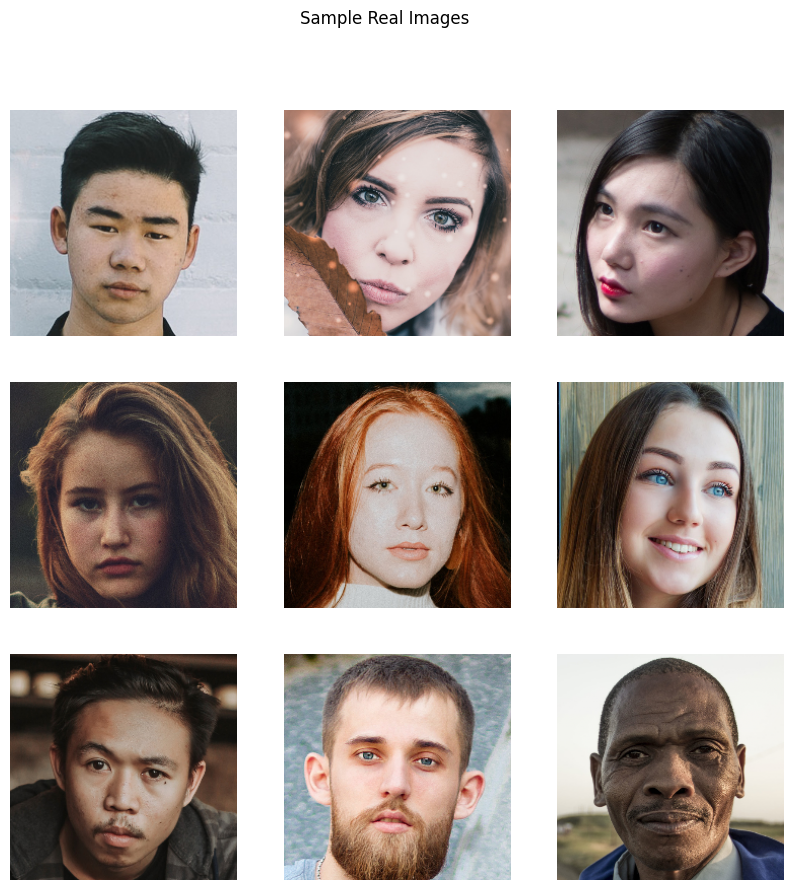

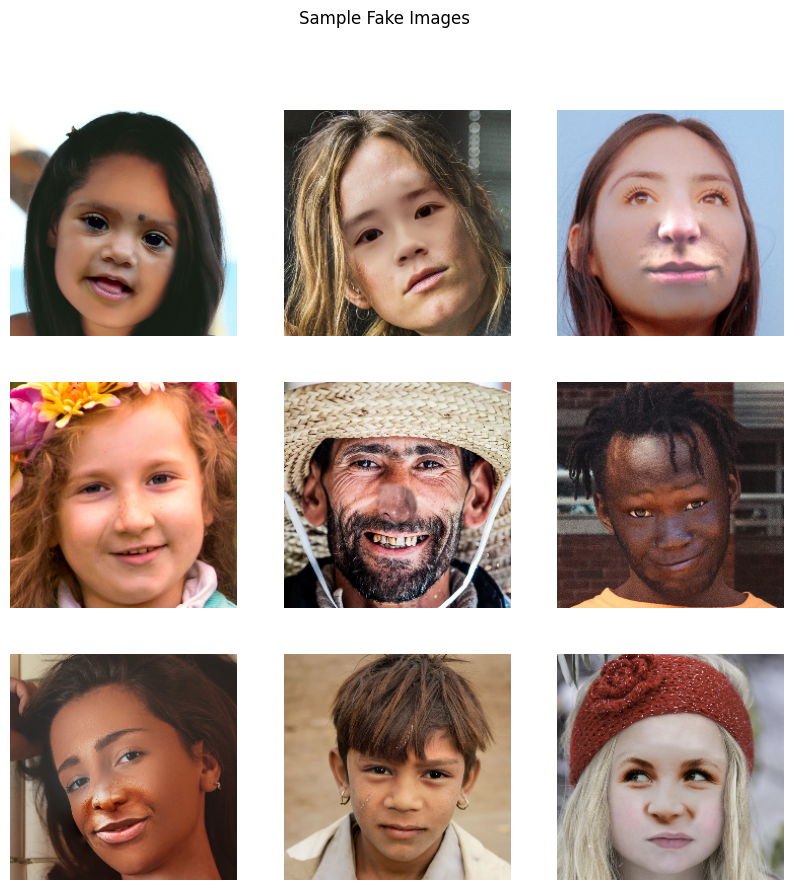

In [ ]:
# Real resimlerden örnekleri göster
show_image_grid(train_real_images_processed, 'Sample Real Images')

# Fake resimlerden örnekleri göster
show_image_grid(train_fake_images_processed, 'Sample Fake Images')

In [ ]:
train_real_fake_dict = {
    "real" : train_real_images_processed,
    "fake" : train_fake_images_processed
}

validation_real_fake_dict = {
    "real" : validation_real_images_processed,
    "fake" : validation_fake_images_processed
}

test_real_fake_dict = {
    "real" : test_real_images_processed,
    "fake" : test_fake_images_processed
}



labels = {
    "real" : 0,
    "fake" : 1
}




# Data Augmentation

In [ ]:
"""data_augmentation = keras.Sequential(
    [
        keras.layers.experimental.preprocessing.RandomFlip("horizontal", input_shape = (224,224,3)),
        keras.layers.experimental.preprocessing.RandomRotation(0.1),
        keras.layers.experimental.preprocessing.RandomZoom(0.1),
    ]
)


x_train_augmented, y_train_augmented = [], []

for label, images in train_real_fake_dict.items():
    for image in images:
        for _ in range(2):
            augmented_image = data_augmentation(tf.expand_dims(image, 0))
            x_train_augmented.append(tf.squeeze(augmented_image, 0).numpy())
            y_train_augmented.append(labels[label])



x_train = np.array(x_train_augmented)
y_train = np.array(y_train_augmented)


num_real_images = len(x_train_augmented)
num_fake_images = len(y_train_augmented)

print(f"toplam Görüntü Sayısı: {num_real_images}")"""



Gerçek Görüntü Sayısı: 2334
Sahte Görüntü Sayısı: 2334


In [ ]:
x_train, y_train = np.empty((0, 224, 224, 3)), np.empty((0,))
x_vali, y_vali = np.empty((0, 224, 224, 3)), np.empty((0,))
x_test, y_test = np.empty((0, 224, 224, 3)), np.empty((0,))

# Train verilerini ekleme
for label, images in train_real_fake_dict.items():
    x_train = np.concatenate((x_train, images), axis=0)
    y_train = np.concatenate((y_train, np.full((len(images),), labels[label])), axis=0)

# Validation verilerini ekleme
for label, images in validation_real_fake_dict.items():
    x_vali = np.concatenate((x_vali, images), axis=0)
    y_vali = np.concatenate((y_vali, np.full((len(images),), labels[label])), axis=0)

# Test verilerini ekleme
for label, images in test_real_fake_dict.items():
    x_test = np.concatenate((x_test, images), axis=0)
    y_test = np.concatenate((y_test, np.full((len(images),), labels[label])), axis=0)


In [ ]:
print(len(x_train))


1167


# **Modeli Oluşturma**
* MobilenetV3Small

In [ ]:
mobilenet_small = keras.applications.MobileNetV3Small(
    input_shape=(224, 224,3 ),
    alpha=1.0,
    minimalistic=False,
    include_top=False,
    weights="imagenet",
    dropout_rate=0.2,
    classifier_activation="softmax",
    classes=1000,
    input_tensor=None,
    pooling=None,
    include_preprocessing=False,
)



4334752/4334752 [==============================] - 1s 0us/step


* MobilenetV3Large

In [ ]:
mobilenet_large = keras.applications.MobileNetV3Large(
    input_shape=(224, 224, 3),
    alpha=1.0,
    minimalistic=False,
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    dropout_rate=0.2,
    pooling=None,
    classes=1000,  # Sınıf sayısı
    classifier_activation='softmax'
)

12683000/12683000 [==============================] - 1s 0us/step


* Shufflenet

In [ ]:
import torch
import torchvision
from torchvision import datasets, transforms, models
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import TensorDataset, DataLoader

In [ ]:
shufflenet = models.shufflenet_v2_x1_0(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ShuffleNet_V2_X1_0_Weights.IMAGENET1K_V1`. You can also use `weights=ShuffleNet_V2_X1_0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/shufflenetv2_x1-5666bf0f80.pth" to /root/.cache/torch/hub/checkpoints/shufflenetv2_x1-5666bf0f80.pth
100%|██████████| 8.79M/8.79M [00:00<00:00, 46.6MB/s]


# Neural Network Oluşturma
* MobilenetV3Small

In [ ]:
small_model = keras.Sequential()
small_model.add(mobilenet_small)
small_model.add(keras.layers.GlobalAveragePooling2D())
small_model.add(keras.layers.Dense(128, activation='relu'))
small_model.add(keras.layers.Dropout(0.3))
small_model.add(keras.layers.Dense(64, activation='relu'))
small_model.add(keras.layers.Dropout(0.3))
small_model.add(keras.layers.Dense(32, activation='relu'))
small_model.add(keras.layers.Dropout(0.5))
small_model.add(keras.layers.Dense(1, activation='sigmoid'))


small_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3small (Function  (None, 7, 7, 576)         939120    
 al)                                                             
                                                                 
 global_average_pooling2d (  (None, 576)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               73856     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

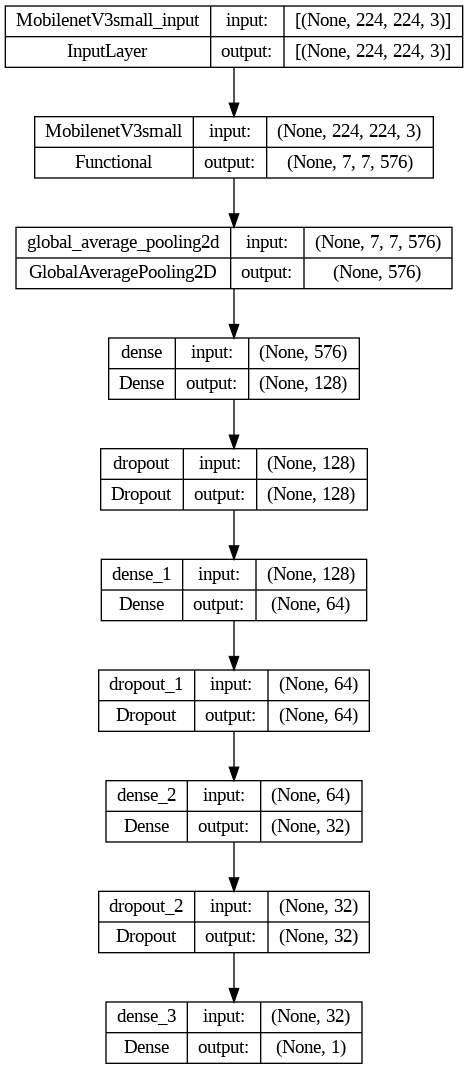

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(small_model, to_file='small_model.png', show_shapes=True, show_layer_names=True)

# Görselleştirmeyi notebook içinde görüntüleyin
Image(filename='small_model.png')

* MobilenetV3Large

In [ ]:
large_model = keras.Sequential()
large_model.add(mobilenet_large)
large_model.add(keras.layers.Flatten())
large_model.add(keras.layers.Dense(128, activation='relu'))
large_model.add(keras.layers.BatchNormalization())
large_model.add(keras.layers.Dropout(0.3))
large_model.add(keras.layers.Dense(1, activation='sigmoid'))


large_model.layers[0].trainable = False

large_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3large (Function  (None, 7, 7, 960)         2996352   
 al)                                                             
                                                                 
 flatten (Flatten)           (None, 47040)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               6021248   
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                

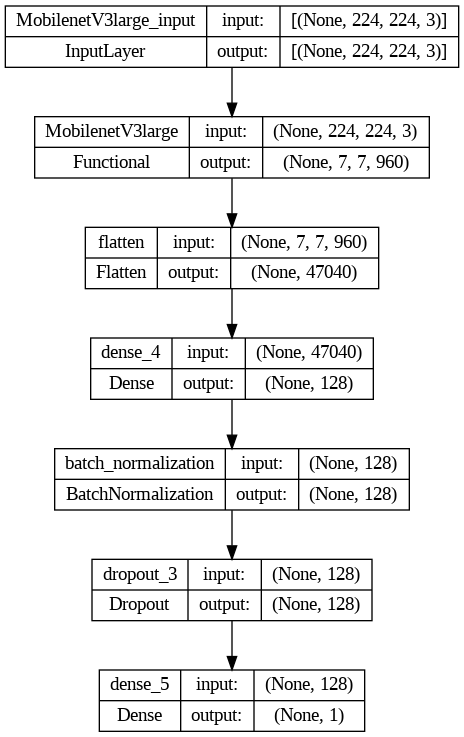

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(large_model, to_file='small_model.png', show_shapes=True, show_layer_names=True)

# Görselleştirmeyi notebook içinde görüntüleyin
Image(filename='small_model.png')

* Shufflenet

In [ ]:



shufflenet = models.shufflenet_v2_x1_0(pretrained=True)
num_classes = 2

shufflenet.fc = nn.Linear(shufflenet.fc.in_features, num_classes)

# Optimizasyon algoritması ve kayıp fonksiyonunu tanımlama
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(shufflenet.parameters(), lr=0.0005)

# Modeli cihaza yükleme (GPU veya CPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
shufflenet.to(device)


* SqueezeNet

In [ ]:
squeezenet = models.squeezenet1_0(pretrained=True)
num_classes = 2 # Sınıf sayısını al
squeezenet.classifier[1] = nn.Conv2d(512, num_classes, kernel_size=(1, 1), stride=(1, 1))

# Optimizasyon algoritması ve kayıp fonksiyonunu tanımlama
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(squeezenet.parameters(), lr=0.001)

# Modeli cihaza yükleme (GPU veya CPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
squeezenet.to(device)

# Modeli Eğitme
* Small

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
loss_fn = tf.keras.losses.BinaryCrossentropy()
small_model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])


small_history = small_model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_vali, y_vali))

test_loss, test_accuracy = small_model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

Epoch 1/50
37/37 [==============================] - 24s 91ms/step - loss: 0.0028 - accuracy: 0.9991 - val_loss: 10.8577 - val_accuracy: 0.5456
Epoch 2/50
37/37 [==============================] - 2s 64ms/step - loss: 0.0047 - accuracy: 0.9983 - val_loss: 9.7733 - val_accuracy: 0.5622
Epoch 3/50
37/37 [==============================] - 2s 65ms/step - loss: 0.0083 - accuracy: 0.9991 - val_loss: 8.3273 - val_accuracy: 0.5768
Epoch 4/50
37/37 [==============================] - 2s 63ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 7.9074 - val_accuracy: 0.5809
Epoch 5/50
37/37 [==============================] - 2s 64ms/step - loss: 0.0021 - accuracy: 0.9991 - val_loss: 6.7527 - val_accuracy: 0.5913
Epoch 6/50
37/37 [==============================] - 2s 64ms/step - loss: 0.0240 - accuracy: 0.9957 - val_loss: 5.9825 - val_accuracy: 0.6369
Epoch 7/50
37/37 [==============================] - 2s 64ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 5.6932 - val_accuracy: 0.6494
Epoch 8/50


9/9 [==============================] - 1s 131ms/step - loss: 3.3391 - accuracy: 0.8423
Test Loss: 3.3391036987304688
Test Accuracy: 0.8423076868057251
9/9 [==============================] - 0s 17ms/step


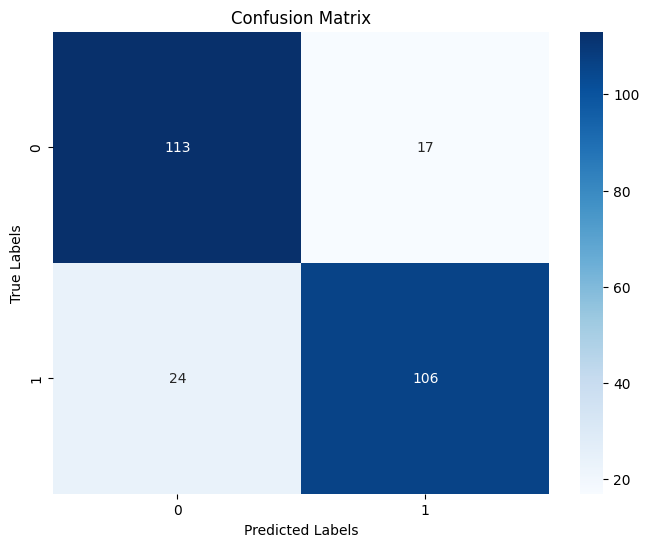

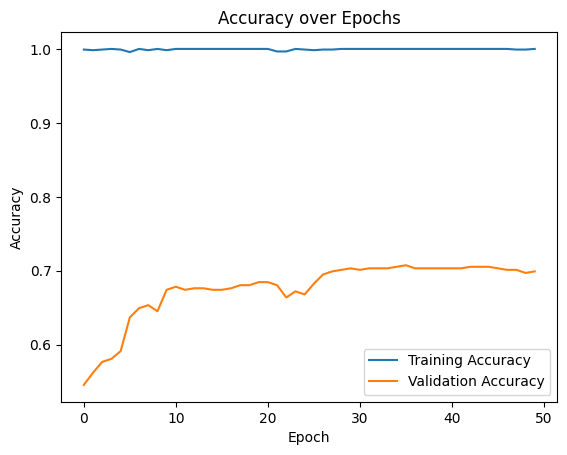

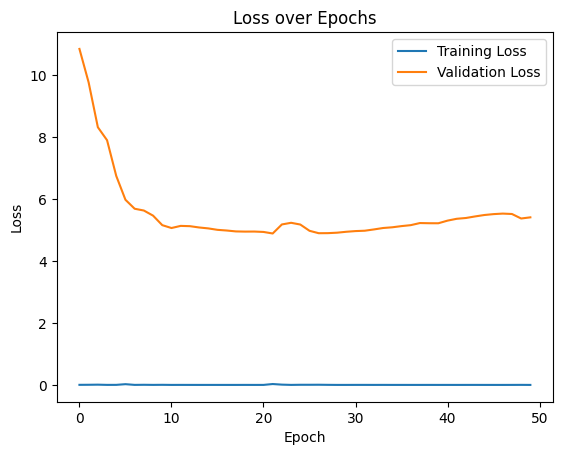

In [ ]:
test_loss, test_accuracy = small_model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Modelin tahminlerini al
y_pred = small_model.predict(x_test)
y_pred = (y_pred > 0.5)  # Sınıfları binary hale getir

# Confusion Matrix'i hesapla
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix'i görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# large Modeli eğitirken history almamışız
# Accuracy grafiğini çizdir
plt.plot(small_history.history['accuracy'], label='Training Accuracy')
plt.plot(small_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()

# Loss grafiğini çizdir
plt.plot(small_history.history['loss'], label='Training Loss')
plt.plot(small_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# Modeli kaydetmek
small_model.save('/content/gdrive/My Drive/small_model_easy.h5')

Mounted at /content/gdrive


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


* Large

In [ ]:
optim = tf.keras.optimizers.Adam(learning_rate=0.0001)
large_model.compile(optimizer=optim, loss='binary_crossentropy', metrics=['accuracy'])


large_history = large_model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_vali, y_vali))

test_loss, test_accuracy = large_model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

Epoch 1/50
35/35 [==============================] - 15s 166ms/step - loss: 0.8068 - accuracy: 0.5515 - val_loss: 0.8226 - val_accuracy: 0.4369
Epoch 2/50
35/35 [==============================] - 2s 53ms/step - loss: 0.6413 - accuracy: 0.6363 - val_loss: 0.7298 - val_accuracy: 0.5704
Epoch 3/50
35/35 [==============================] - 2s 54ms/step - loss: 0.6260 - accuracy: 0.6682 - val_loss: 0.6761 - val_accuracy: 0.5704
Epoch 4/50
35/35 [==============================] - 2s 55ms/step - loss: 0.5698 - accuracy: 0.7129 - val_loss: 0.6741 - val_accuracy: 0.5655
Epoch 5/50
35/35 [==============================] - 2s 53ms/step - loss: 0.5278 - accuracy: 0.7138 - val_loss: 0.6706 - val_accuracy: 0.6019
Epoch 6/50
35/35 [==============================] - 2s 52ms/step - loss: 0.5130 - accuracy: 0.7384 - val_loss: 1.0712 - val_accuracy: 0.5680
Epoch 7/50
35/35 [==============================] - 2s 54ms/step - loss: 0.4850 - accuracy: 0.7530 - val_loss: 0.6860 - val_accuracy: 0.5874
Epoch 8/50


7/7 [==============================] - 0s 40ms/step - loss: 1.3984 - accuracy: 0.5750
Test Loss: 1.3983752727508545
Test Accuracy: 0.574999988079071
7/7 [==============================] - 1s 43ms/step


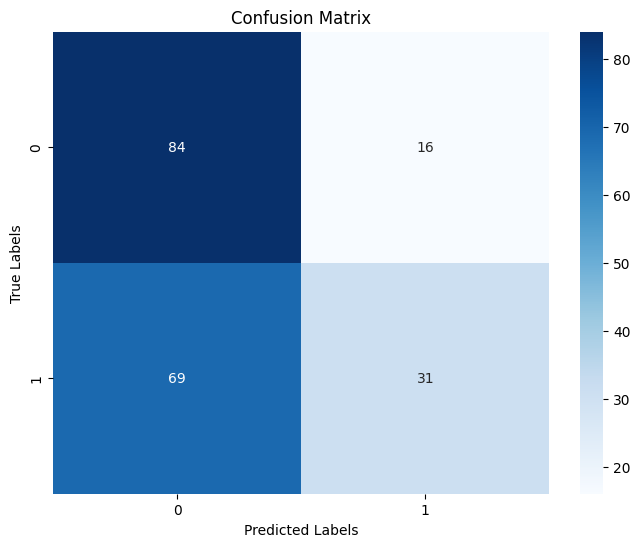

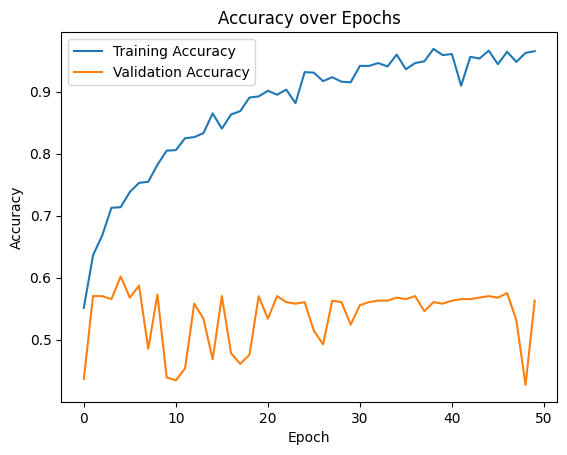

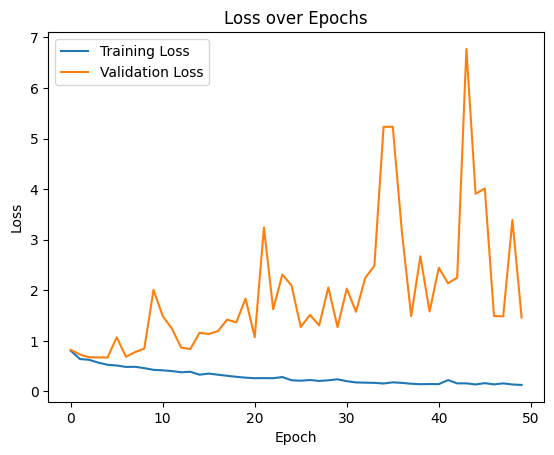

In [ ]:
test_loss, test_accuracy = large_model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Modelin tahminlerini al
y_pred = large_model.predict(x_test)
y_pred = (y_pred > 0.5)  # Sınıfları binary hale getir

# Confusion Matrix'i hesapla
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix'i görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# large Modeli eğitirken history almamışız
# Accuracy grafiğini çizdir
plt.plot(large_history.history['accuracy'], label='Training Accuracy')
plt.plot(large_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()

# Loss grafiğini çizdir
plt.plot(large_history.history['loss'], label='Training Loss')
plt.plot(large_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()

* Shufflenet

In [ ]:


num_epochs = 15
for epoch in range(num_epochs):
    shufflenet.train()  # Eğitim modunda
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = shufflenet(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Her epoch sonunda kaybı yazdırma
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")



shufflenet.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = shufflenet(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total}%")

Epoch 1/15, Loss: 0.6716428270211091
Epoch 2/15, Loss: 0.516330240546046
Epoch 3/15, Loss: 0.30877571774495616
Epoch 4/15, Loss: 0.15453850175883319
Epoch 5/15, Loss: 0.08712029789347907
Epoch 6/15, Loss: 0.0667571306379663
Epoch 7/15, Loss: 0.0447283968883189
Epoch 8/15, Loss: 0.05439146783051861
Epoch 9/15, Loss: 0.04535279576540799
Epoch 10/15, Loss: 0.025232558031692297
Epoch 11/15, Loss: 0.021172963951185748
Epoch 12/15, Loss: 0.026670884617881196
Epoch 13/15, Loss: 0.0430367115532627
Epoch 14/15, Loss: 0.035055713495239615
Epoch 15/15, Loss: 0.021192065116043227
Test Accuracy: 68.33333333333333%


* SqueezeNet

In [ ]:
!pip install keras_applications

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.5 MB/s eta 0:00:00


# Shufflenet Yeniden

In [ ]:
from tensorflow.keras import backend as K
#from keras.applications.imagenet_utils import _obtain_input_shape
from keras_applications.imagenet_utils import _obtain_input_shape
#from tensorflow.keras.models import Model


from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout

from tensorflow.keras.layers import Activation, Add, Concatenate, GlobalAveragePooling2D,GlobalMaxPooling2D, Input, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, BatchNormalization, Lambda

from tensorflow.keras.utils import get_file
from tensorflow.keras.layers import DepthwiseConv2D
import numpy as np
import numpy as np

from tensorflow.python.keras import backend as K

from tensorflow.python.util import nest
from tensorflow.python.util.tf_export import keras_export

def get_source_inputs(tensor, layer=None, node_index=None):

  if not hasattr(tensor, '_keras_history'):
    return tensor

  if layer is None or node_index:
    layer, node_index, _ = tensor._keras_history
  if not layer._inbound_nodes:
    return [tensor]
  else:
    node = layer._inbound_nodes[node_index]
    if not node.inbound_layers:
      # Reached an Input layer, stop recursion.
      return nest.flatten(node.input_tensors)
    else:
      source_tensors = []
      for layer, node_index, _, tensor in node.iterate_inbound():
        previous_sources = get_source_inputs(tensor, layer, node_index)
        # Avoid input redundancy.
        for x in previous_sources:
          if x not in source_tensors:
            source_tensors.append(x)
      return source_tensors

def ShuffleNet(include_top=True, input_tensor=None, scale_factor=1.0, pooling='max',weights = None,
               input_shape=(224,224,3), groups=1, load_model=None, num_shuffle_units=[3, 7, 3],
               bottleneck_ratio=0.25, classes=1000):

    if K.backend() != 'tensorflow':
        raise RuntimeError('Only TensorFlow backend is currently supported, '
                           'as other backends do not support ')

    name = "ShuffleNet_%.2gX_g%d_br_%.2g_%s" % (scale_factor, groups, bottleneck_ratio, "".join([str(x) for x in num_shuffle_units]))

    input_shape = _obtain_input_shape(input_shape,
                                      default_size=224,
                                      min_size=48,
                                      data_format=K.image_data_format(),
                                      require_flatten=include_top)


    out_dim_stage_two = {1: 144, 2: 200, 3: 240, 4: 272, 8: 384}
    if groups not in out_dim_stage_two:
        raise ValueError("Invalid number of groups.")

    if pooling not in ['max','avg']:
        raise ValueError("Invalid value for pooling.")

    if not (float(scale_factor) * 4).is_integer():
        raise ValueError("Invalid value for scale_factor. Should be x over 4.")

    exp = np.insert(np.arange(0, len(num_shuffle_units), dtype=np.float32), 0, 0)
    out_channels_in_stage = 2 ** exp
    out_channels_in_stage *= out_dim_stage_two[groups]  # calculate output channels for each stage
    out_channels_in_stage[0] = 24  # first stage has always 24 output channels
    out_channels_in_stage *= scale_factor
    out_channels_in_stage = out_channels_in_stage.astype(int)

    if input_tensor is None:
        img_input = Input(shape=input_shape)
    else:
        if not K.is_keras_tensor(input_tensor):
            img_input = Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor

    # create shufflenet architecture
    x = Conv2D(filters=out_channels_in_stage[0], kernel_size=(3, 3), padding='same',
               use_bias=False, strides=(2, 2), activation="relu", name="conv1")(img_input)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same', name="maxpool1")(x)

    # create stages containing shufflenet units beginning at stage 2
    for stage in range(0, len(num_shuffle_units)):
        repeat = num_shuffle_units[stage]
        x = _block(x, out_channels_in_stage, repeat=repeat,
                   bottleneck_ratio=bottleneck_ratio,
                   groups=groups, stage=stage + 2)

    if pooling == 'avg':
        x = GlobalAveragePooling2D(name="global_pool")(x)
    elif pooling == 'max':
        x = GlobalMaxPooling2D(name="global_pool")(x)

    if include_top:
        x = Dense(units=classes, name="fc")(x)
        x = Activation('softmax', name='softmax')(x)


    if input_tensor is not None:
        inputs = get_source_inputs(input_tensor)
    else:
        inputs = img_input

    model = Model(inputs=inputs, outputs=x, name=name)

    if load_model is not None:
        model.load_weights('', by_name=True)

    return model


def _block(x, channel_map, bottleneck_ratio, repeat=1, groups=1, stage=1):

    x = _shuffle_unit(x, in_channels=channel_map[stage - 2],
                      out_channels=channel_map[stage - 1], strides=2,
                      groups=groups, bottleneck_ratio=bottleneck_ratio,
                      stage=stage, block=1)

    for i in range(1, repeat + 1):
        x = _shuffle_unit(x, in_channels=channel_map[stage - 1],
                          out_channels=channel_map[stage - 1], strides=1,
                          groups=groups, bottleneck_ratio=bottleneck_ratio,
                          stage=stage, block=(i + 1))

    return x


def _shuffle_unit(inputs, in_channels, out_channels, groups, bottleneck_ratio, strides=2, stage=1, block=1):

    if K.image_data_format() == 'channels_last':
        bn_axis = -1
    else:
        bn_axis = 1

    prefix = 'stage%d/block%d' % (stage, block)

    #if strides >= 2:
        #out_channels -= in_channels

    # default: 1/4 of the output channel of a ShuffleNet Unit
    bottleneck_channels = int(out_channels * bottleneck_ratio)
    groups = (1 if stage == 2 and block == 1 else groups)

    x = _group_conv(inputs, in_channels, out_channels=bottleneck_channels,
                    groups=(1 if stage == 2 and block == 1 else groups),
                    name='%s/1x1_gconv_1' % prefix)
    x = BatchNormalization(axis=bn_axis, name='%s/bn_gconv_1' % prefix)(x)
    x = Activation('relu', name='%s/relu_gconv_1' % prefix)(x)

    x = Lambda(channel_shuffle, arguments={'groups': groups}, name='%s/channel_shuffle' % prefix)(x)
    x = DepthwiseConv2D(kernel_size=(3, 3), padding="same", use_bias=False,
                        strides=strides, name='%s/1x1_dwconv_1' % prefix)(x)
    x = BatchNormalization(axis=bn_axis, name='%s/bn_dwconv_1' % prefix)(x)

    x = _group_conv(x, bottleneck_channels, out_channels=out_channels if strides == 1 else out_channels - in_channels,
                    groups=groups, name='%s/1x1_gconv_2' % prefix)
    x = BatchNormalization(axis=bn_axis, name='%s/bn_gconv_2' % prefix)(x)

    if strides < 2:
        ret = Add(name='%s/add' % prefix)([x, inputs])
    else:
        avg = AveragePooling2D(pool_size=3, strides=2, padding='same', name='%s/avg_pool' % prefix)(inputs)
        ret = Concatenate(bn_axis, name='%s/concat' % prefix)([x, avg])

    ret = Activation('relu', name='%s/relu_out' % prefix)(ret)

    return ret


def _group_conv(x, in_channels, out_channels, groups, kernel=1, stride=1, name=''):

    if groups == 1:
        return Conv2D(filters=out_channels, kernel_size=kernel, padding='same',
                      use_bias=False, strides=stride, name=name)(x)

    # number of intput channels per group
    ig = in_channels // groups
    group_list = []

    assert out_channels % groups == 0

    for i in range(groups):
        offset = i * ig
        group = Lambda(lambda z: z[:, :, :, offset: offset + ig], name='%s/g%d_slice' % (name, i))(x)
        group_list.append(Conv2D(int(0.5 + out_channels / groups), kernel_size=kernel, strides=stride,
                                 use_bias=False, padding='same', name='%s_/g%d' % (name, i))(group))
    return Concatenate(name='%s/concat' % name)(group_list)


def channel_shuffle(x, groups):

    height, width, in_channels = x.shape.as_list()[1:]
    channels_per_group = in_channels // groups

    x = K.reshape(x, [-1, height, width, groups, channels_per_group])
    x = K.permute_dimensions(x, (0, 1, 2, 4, 3))  # transpose
    x = K.reshape(x, [-1, height, width, in_channels])

    return x


In [ ]:
shufflenet_model = ShuffleNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


shufflenet_model.summary()

Model: "ShuffleNet_1X_g1_br_0.25_373"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1 (Conv2D)              (None, 112, 112, 24)         648       ['input_3[0][0]']             
                                                                                                  
 maxpool1 (MaxPooling2D)     (None, 56, 56, 24)           0         ['conv1[0][0]']               
                                                                                                  
 stage2/block1/1x1_gconv_1   (None, 56, 56, 36)           864       ['maxpool1[0][0]']            
 (Conv2D)                                                              

In [ ]:
model = keras.models.Sequential()
model.add(shufflenet_model)  # Shufflenet modeli
#model.add(keras.layers.Flatten())  # Flatten katmanı
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(1, activation='sigmoid'))  # Çıkış katmanı

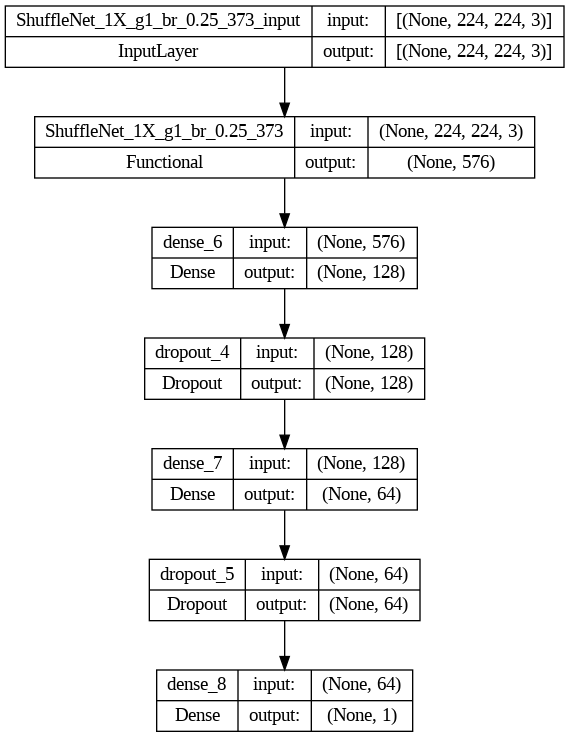

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='small_model.png', show_shapes=True, show_layer_names=True)

# Görselleştirmeyi notebook içinde görüntüleyin
Image(filename='small_model.png')

In [ ]:
optim = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optim, loss='binary_crossentropy', metrics=['accuracy'])


model_history = model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_vali, y_vali))

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

Epoch 1/50
35/35 [==============================] - 30s 143ms/step - loss: 1.7781 - accuracy: 0.5105 - val_loss: 0.6923 - val_accuracy: 0.5413
Epoch 2/50
35/35 [==============================] - 2s 55ms/step - loss: 0.9592 - accuracy: 0.5442 - val_loss: 0.6923 - val_accuracy: 0.5485
Epoch 3/50
35/35 [==============================] - 2s 57ms/step - loss: 0.8059 - accuracy: 0.5743 - val_loss: 0.6866 - val_accuracy: 0.5680
Epoch 4/50
35/35 [==============================] - 2s 56ms/step - loss: 0.7372 - accuracy: 0.5880 - val_loss: 0.6848 - val_accuracy: 0.5680
Epoch 5/50
35/35 [==============================] - 2s 56ms/step - loss: 0.6552 - accuracy: 0.6408 - val_loss: 0.6842 - val_accuracy: 0.5680
Epoch 6/50
35/35 [==============================] - 2s 57ms/step - loss: 0.6444 - accuracy: 0.6418 - val_loss: 0.6844 - val_accuracy: 0.5680
Epoch 7/50
35/35 [==============================] - 2s 58ms/step - loss: 0.6157 - accuracy: 0.6645 - val_loss: 0.6862 - val_accuracy: 0.5680
Epoch 8/50


7/7 [==============================] - 0s 21ms/step - loss: 1.3724 - accuracy: 0.5500
Test Loss: 1.3724069595336914
Test Accuracy: 0.550000011920929
7/7 [==============================] - 1s 20ms/step


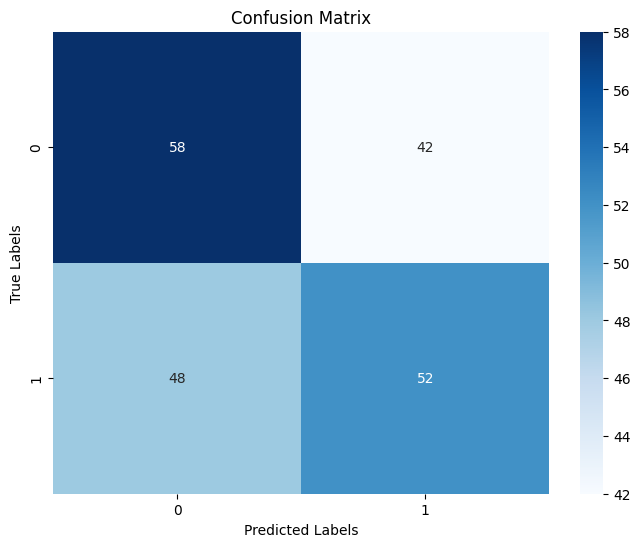

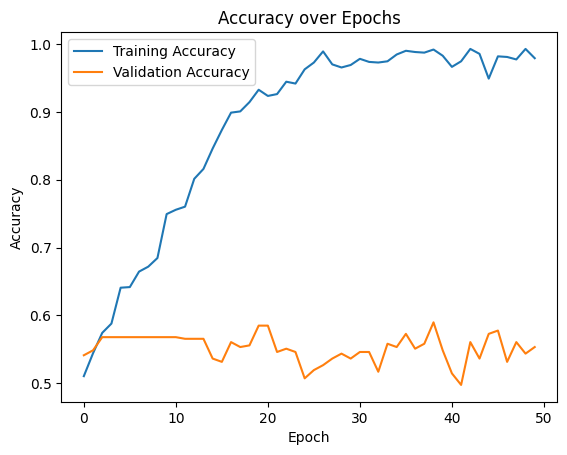

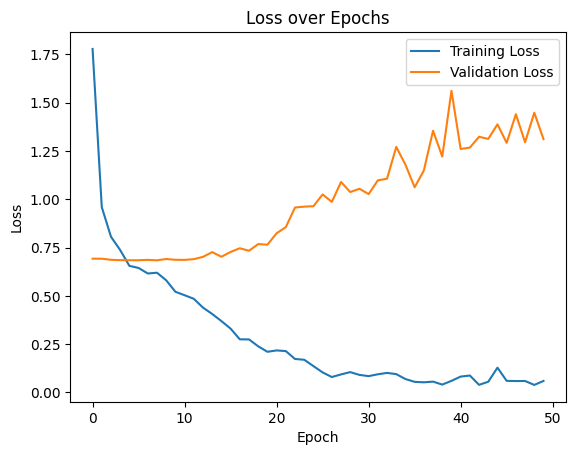

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Modelin tahminlerini al
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)  # Sınıfları binary hale getir

# Confusion Matrix'i hesapla
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix'i görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# large Modeli eğitirken history almamışız
# Accuracy grafiğini çizdir
plt.plot(model_history.history['accuracy'], label='Training Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()

# Loss grafiğini çizdir
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()

# SQUEEZE NET YENİDEN

In [ ]:
from keras_applications.imagenet_utils import _obtain_input_shape
from keras import backend as K
from keras.layers import Input, Convolution2D, MaxPooling2D, Activation, concatenate, Dropout, GlobalAveragePooling2D, BatchNormalization
from keras.models import Model
#from keras.engine.topology import get_source_inputs
from keras.utils import get_file
#from keras.utils import layer_utils

sq1x1 = "squeeze1x1"
exp1x1 = "expand1x1"
exp3x3 = "expand3x3"
relu = "relu_"

WEIGHTS_PATH = "https://github.com/rcmalli/keras-squeezenet/releases/download/v1.0/squeezenet_weights_tf_dim_ordering_tf_kernels.h5"

# Modular function for Fire Node

def fire_module(x, fire_id, squeeze=16, expand=64):
    s_id = 'fire' + str(fire_id) + '/'

    if K.image_data_format() == 'channels_first':
        channel_axis = 1
    else:
        channel_axis = 3

    x = Convolution2D(squeeze, (1, 1), padding='valid', name=s_id + sq1x1)(x)
    x = Activation('relu', name=s_id + relu + sq1x1)(x)

    left = Convolution2D(expand, (1, 1), padding='valid', name=s_id + exp1x1)(x)
    left = Activation('relu', name=s_id + relu + exp1x1)(left)

    right = Convolution2D(expand, (3, 3), padding='same', name=s_id + exp3x3)(x)
    right = Activation('relu', name=s_id + relu + exp3x3)(right)

    x = concatenate([left, right], axis=channel_axis, name=s_id + 'concat')
    return x


# Original SqueezeNet from paper.

def SqueezeNet(input_tensor=None, input_shape=None,
               weights='imagenet',
               classes=1000,
              use_bn_on_input = False, # to avoid preprocessing
               first_stride = 2
              ):
    if weights not in {'imagenet', None}:
        raise ValueError('The `weights` argument should be either '
                         '`None` (random initialization) or `imagenet` '
                         '(pre-training on ImageNet).')

    if weights == 'imagenet' and classes != 1000:
        raise ValueError('If using `weights` as imagenet with `include_top`'
                         ' as true, `classes` should be 1000')


    input_shape = _obtain_input_shape(input_shape,
                                      default_size=227,
                                      min_size=48,
                                      data_format=K.image_data_format(),
                                     require_flatten = False)

    if input_tensor is None:
        raw_img_input = Input(shape=input_shape)
    else:
        if not K.is_keras_tensor(input_tensor):
            img_input = Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor
    if use_bn_on_input:
        img_input = BatchNormalization()(raw_img_input)
    else:
        img_input = raw_img_input


    x = Convolution2D(64, (3, 3), strides=(first_stride, first_stride), padding='valid', name='conv1')(img_input)
    x = Activation('relu', name='relu_conv1')(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), name='pool1')(x)

    x = fire_module(x, fire_id=2, squeeze=16, expand=64)
    x = fire_module(x, fire_id=3, squeeze=16, expand=64)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), name='pool3')(x)

    x = fire_module(x, fire_id=4, squeeze=32, expand=128)
    x = fire_module(x, fire_id=5, squeeze=32, expand=128)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), name='pool5')(x)

    x = fire_module(x, fire_id=6, squeeze=48, expand=192)
    x = fire_module(x, fire_id=7, squeeze=48, expand=192)
    x = fire_module(x, fire_id=8, squeeze=64, expand=256)
    x = fire_module(x, fire_id=9, squeeze=64, expand=256)
    x = Dropout(0.5, name='drop9')(x)

    x = Convolution2D(classes, (1, 1), padding='valid', name='conv10')(x)
    x = Activation('relu', name='relu_conv10')(x)
    x = GlobalAveragePooling2D()(x)
    out = Activation('softmax', name='loss')(x)

    # Ensure that the model takes into account
    # any potential predecessors of `input_tensor`.
    if input_tensor is not None:
        inputs = get_source_inputs(input_tensor)
    else:
        inputs = raw_img_input

    model = Model(inputs, out, name='squeezenet')

    # load weights
    if weights == 'imagenet':

        weights_path = get_file('squeezenet_weights_tf_dim_ordering_tf_kernels.h5',
                                    WEIGHTS_PATH,
                                    cache_subdir='models')
        model.load_weights(weights_path)
        if K.backend() == 'theano':
            layer_utils.convert_all_kernels_in_model(model)

        if K.image_data_format() == 'channels_first':

            if K.backend() == 'tensorflow':
                warnings.warn('You are using the TensorFlow backend, yet you '
                              'are using the Theano '
                              'image data format convention '
                              '(`image_data_format="channels_first"`). '
                              'For best performance, set '
                              '`image_data_format="channels_last"` in '
                              'your Keras config '
                              'at ~/.keras/keras.json.')
    return model

In [ ]:
squeeze_net_model = SqueezeNet(weights='imagenet',input_shape=(224, 224, 3), classes=1000)



5059384/5059384 [==============================] - 0s 0us/step


In [ ]:
squeeze_model = keras.models.Sequential()
squeeze_model.add(squeeze_net_model)
squeeze_model.add(keras.layers.Flatten())  # Flatten katmanı
squeeze_model.add(keras.layers.Dropout(0.6))
squeeze_model.add(keras.layers.Dense(1, activation='sigmoid'))  # Çıkış katmanı

squeeze_model.layers[0].trainable = False

squeeze_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 squeezenet (Functional)     (None, 1000)              1235496   
                                                                 
 flatten_1 (Flatten)         (None, 1000)              0         
                                                                 
 dropout_6 (Dropout)         (None, 1000)              0         
                                                                 
 dense_9 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 1236497 (4.72 MB)
Trainable params: 1001 (3.91 KB)
Non-trainable params: 1235496 (4.71 MB)
_________________________________________________________________


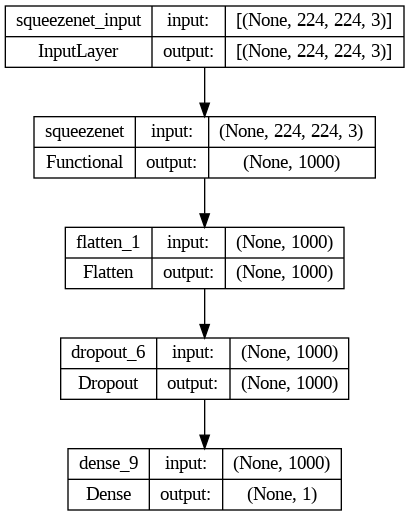

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(squeeze_model, to_file='small_model.png', show_shapes=True, show_layer_names=True)

# Görselleştirmeyi notebook içinde görüntüleyin
Image(filename='small_model.png')

In [ ]:
optim = tf.keras.optimizers.Adam(learning_rate=0.0001)

squeeze_model.compile(optimizer=optim, loss='binary_crossentropy', metrics=['accuracy'])


squeeze_history = squeeze_model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_vali, y_vali))

test_loss, test_accuracy = squeeze_model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

Epoch 1/50
35/35 [==============================] - 3s 63ms/step - loss: 0.6872 - accuracy: 0.5606 - val_loss: 0.6867 - val_accuracy: 0.5680
Epoch 2/50
35/35 [==============================] - 1s 31ms/step - loss: 0.6873 - accuracy: 0.5606 - val_loss: 0.6867 - val_accuracy: 0.5680
Epoch 3/50
35/35 [==============================] - 1s 32ms/step - loss: 0.6869 - accuracy: 0.5606 - val_loss: 0.6866 - val_accuracy: 0.5680
Epoch 4/50
35/35 [==============================] - 1s 32ms/step - loss: 0.6876 - accuracy: 0.5606 - val_loss: 0.6865 - val_accuracy: 0.5680
Epoch 5/50
35/35 [==============================] - 1s 32ms/step - loss: 0.6877 - accuracy: 0.5606 - val_loss: 0.6864 - val_accuracy: 0.5680
Epoch 6/50
35/35 [==============================] - 1s 34ms/step - loss: 0.6877 - accuracy: 0.5606 - val_loss: 0.6864 - val_accuracy: 0.5680
Epoch 7/50
35/35 [==============================] - 1s 32ms/step - loss: 0.6874 - accuracy: 0.5606 - val_loss: 0.6863 - val_accuracy: 0.5680
Epoch 8/50
35

7/7 [==============================] - 0s 23ms/step - loss: 0.6972 - accuracy: 0.5000
Test Loss: 0.6972188353538513
Test Accuracy: 0.5
7/7 [==============================] - 0s 23ms/step


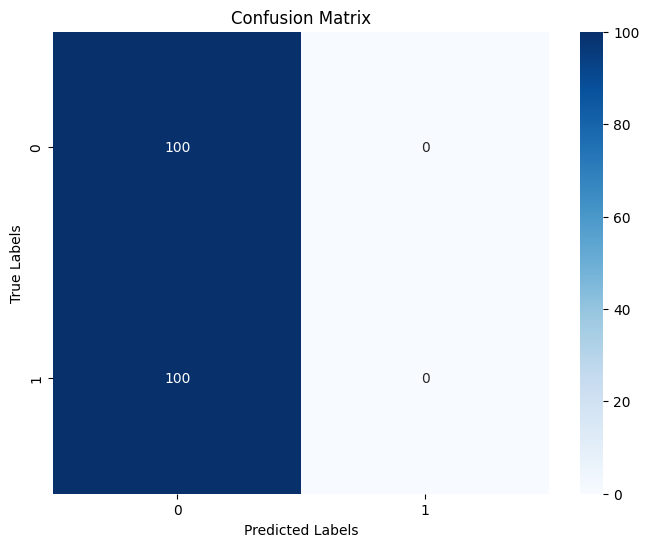

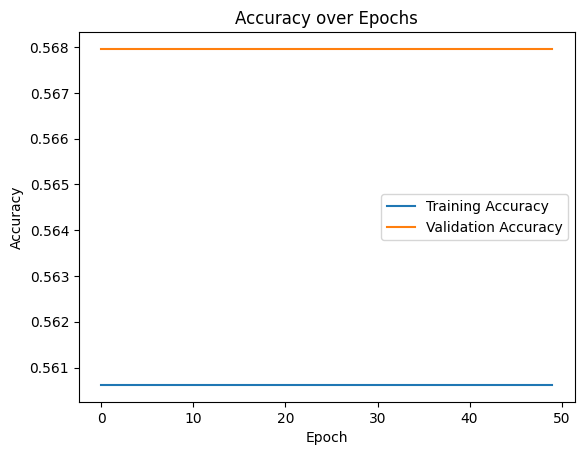

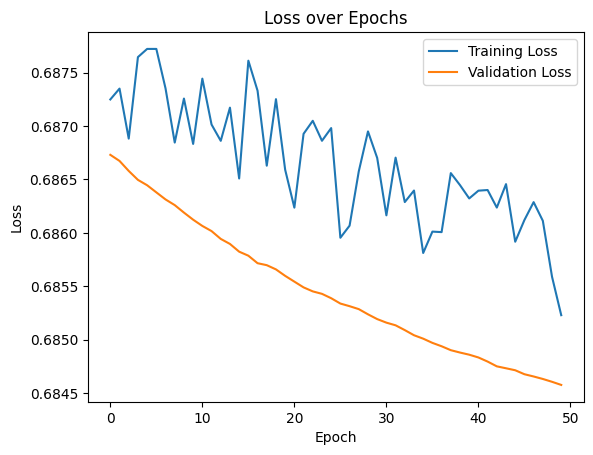

In [ ]:
test_loss, test_accuracy = squeeze_model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Modelin tahminlerini al
y_pred = squeeze_model.predict(x_test)
y_pred = (y_pred > 0.5)  # Sınıfları binary hale getir

# Confusion Matrix'i hesapla
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix'i görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# large Modeli eğitirken history almamışız
# Accuracy grafiğini çizdir
plt.plot(squeeze_history.history['accuracy'], label='Training Accuracy')
plt.plot(squeeze_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()

# Loss grafiğini çizdir
plt.plot(squeeze_history.history['loss'], label='Training Loss')
plt.plot(squeeze_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()

# RESNET50

In [ ]:
resnet = tf.keras.applications.ResNet50(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling='avg',

)



resnet.summary()


94765736/94765736 [==============================] - 3s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_5[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                      

In [ ]:
resnet_model = keras.models.Sequential()
resnet_model.add(resnet)
resnet_model.add(keras.layers.Dense(16, activation='relu'))  # Flatten katmanı
resnet_model.add(keras.layers.Dropout(0.6))
resnet_model.add(keras.layers.Dense(1, activation='sigmoid'))

resnet_model.layers[0].trainable = False
resnet_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_12 (Dense)            (None, 16)                32784     
                                                                 
 dropout_8 (Dropout)         (None, 16)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                 17        
                                                                 
Total params: 23620513 (90.11 MB)
Trainable params: 32801 (128.13 KB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


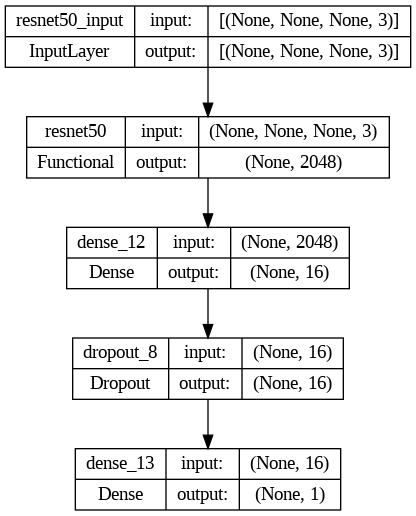

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(resnet_model, to_file='small_model.png', show_shapes=True, show_layer_names=True)

# Görselleştirmeyi notebook içinde görüntüleyin
Image(filename='small_model.png')

In [ ]:

optim = keras.optimizers.legacy.Adam(learning_rate = 0.0001)
resnet_model.compile(optimizer = optim, loss = 'binary_crossentropy', metrics = ['accuracy'])


resnet_history = resnet_model.fit(x_train,y_train, batch_size=32, epochs=50, validation_data=[x_vali,y_vali])

test_loss, test_accuracy = resnet_model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# güzel bir sonuç alınamadı

Epoch 1/50
35/35 [==============================] - 14s 254ms/step - loss: 0.7945 - accuracy: 0.4986 - val_loss: 0.6833 - val_accuracy: 0.5680
Epoch 2/50
35/35 [==============================] - 4s 125ms/step - loss: 0.7187 - accuracy: 0.5050 - val_loss: 0.6850 - val_accuracy: 0.5728
Epoch 3/50
35/35 [==============================] - 4s 125ms/step - loss: 0.6957 - accuracy: 0.4977 - val_loss: 0.6864 - val_accuracy: 0.5728
Epoch 4/50
35/35 [==============================] - 4s 126ms/step - loss: 0.6858 - accuracy: 0.5469 - val_loss: 0.6841 - val_accuracy: 0.5704
Epoch 5/50
35/35 [==============================] - 4s 127ms/step - loss: 0.6866 - accuracy: 0.5542 - val_loss: 0.6839 - val_accuracy: 0.5680
Epoch 6/50
35/35 [==============================] - 4s 126ms/step - loss: 0.6871 - accuracy: 0.5561 - val_loss: 0.6862 - val_accuracy: 0.5704
Epoch 7/50
35/35 [==============================] - 4s 127ms/step - loss: 0.6877 - accuracy: 0.5606 - val_loss: 0.6845 - val_accuracy: 0.5704
Epoch

7/7 [==============================] - 1s 87ms/step - loss: 0.6942 - accuracy: 0.5050
Test Loss: 0.6942186951637268
Test Accuracy: 0.5049999952316284
7/7 [==============================] - 2s 101ms/step


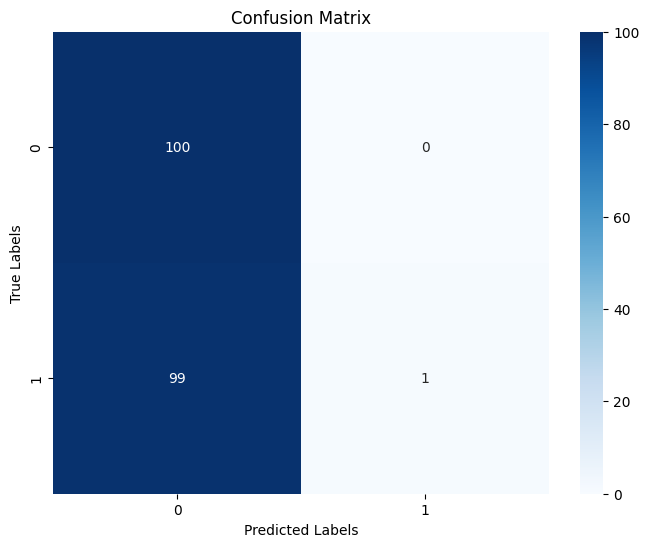

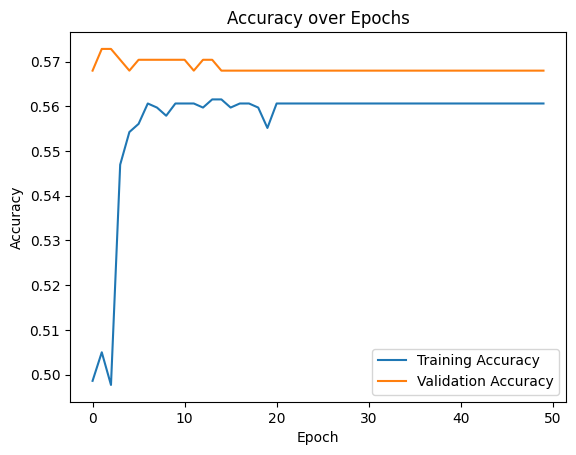

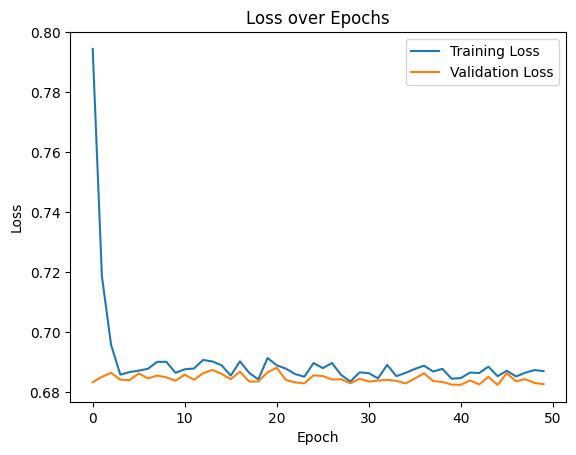

In [ ]:
test_loss, test_accuracy = resnet_model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Modelin tahminlerini al
y_pred = resnet_model.predict(x_test)
y_pred = (y_pred > 0.5)  # Sınıfları binary hale getir

# Confusion Matrix'i hesapla
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix'i görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# large Modeli eğitirken history almamışız
# Accuracy grafiğini çizdir
plt.plot(resnet_history.history['accuracy'], label='Training Accuracy')
plt.plot(resnet_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()

# Loss grafiğini çizdir
plt.plot(resnet_history.history['loss'], label='Training Loss')
plt.plot(resnet_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()

# VGGNET

In [ ]:
vgg16 = tf.keras.applications.VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3),
    pooling='avg',

)



print("---------------------viyuviyu----------------------------")
vgg16.summary()

58889256/58889256 [==============================] - 4s 0us/step
---------------------viyuviyu----------------------------
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
    

In [ ]:
vgg_model = keras.models.Sequential()
vgg_model.add(vgg16)

#vgg_model.add(keras.layers.Flatten())  # Flatten katmanı
vgg_model.add(keras.layers.Dense(256, activation='relu'))
vgg_model.add(keras.layers.Dropout(0,6))
vgg_model.add(keras.layers.Dense(1, activation='sigmoid'))

vgg_model.layers[0].trainable = False
vgg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 14846273 (56.63 MB)
Trainable params: 131585 (514.00 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


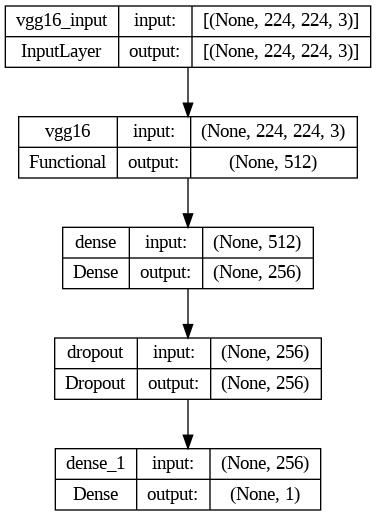

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(vgg_model, to_file='small_model.png', show_shapes=True, show_layer_names=True)

# Görselleştirmeyi notebook içinde görüntüleyin
Image(filename='small_model.png')

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
vgg_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

vgg_history = vgg_model.fit(x_train,y_train, batch_size=32, epochs=50, validation_data=[x_vali,y_vali])

test_loss, test_accuracy = vgg_model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

Epoch 1/50
35/35 [==============================] - 7s 166ms/step - loss: 0.6453 - accuracy: 0.6226 - val_loss: 0.6523 - val_accuracy: 0.6141
Epoch 2/50
35/35 [==============================] - 6s 160ms/step - loss: 0.6400 - accuracy: 0.6281 - val_loss: 0.6500 - val_accuracy: 0.6044
Epoch 3/50
35/35 [==============================] - 6s 161ms/step - loss: 0.6429 - accuracy: 0.6199 - val_loss: 0.6549 - val_accuracy: 0.6068
Epoch 4/50
35/35 [==============================] - 6s 162ms/step - loss: 0.6373 - accuracy: 0.6263 - val_loss: 0.6477 - val_accuracy: 0.5947
Epoch 5/50
35/35 [==============================] - 6s 161ms/step - loss: 0.6332 - accuracy: 0.6445 - val_loss: 0.6462 - val_accuracy: 0.6092
Epoch 6/50
35/35 [==============================] - 6s 161ms/step - loss: 0.6304 - accuracy: 0.6454 - val_loss: 0.6499 - val_accuracy: 0.6189
Epoch 7/50
35/35 [==============================] - 6s 162ms/step - loss: 0.6279 - accuracy: 0.6490 - val_loss: 0.6440 - val_accuracy: 0.6068
Epoch 

7/7 [==============================] - 1s 107ms/step - loss: 0.6810 - accuracy: 0.6000
Test Loss: 0.6809954643249512
Test Accuracy: 0.6000000238418579
7/7 [==============================] - 1s 122ms/step


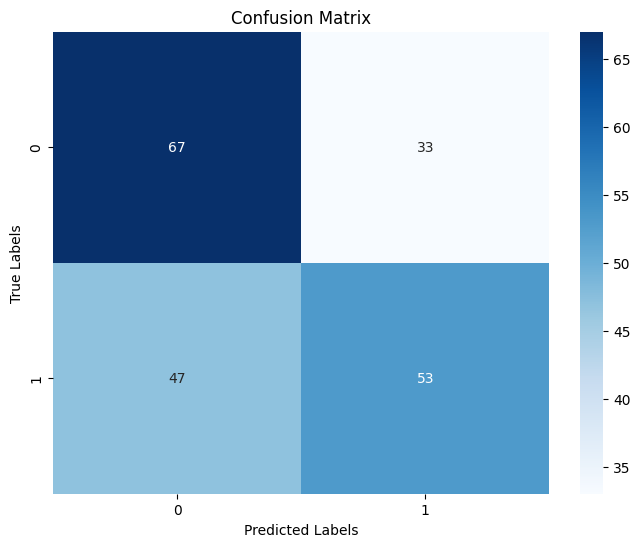

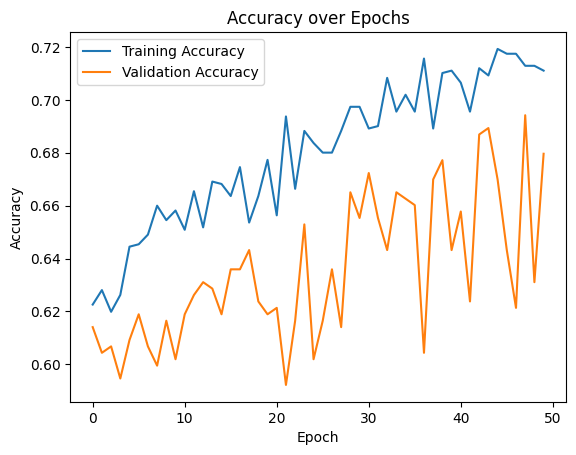

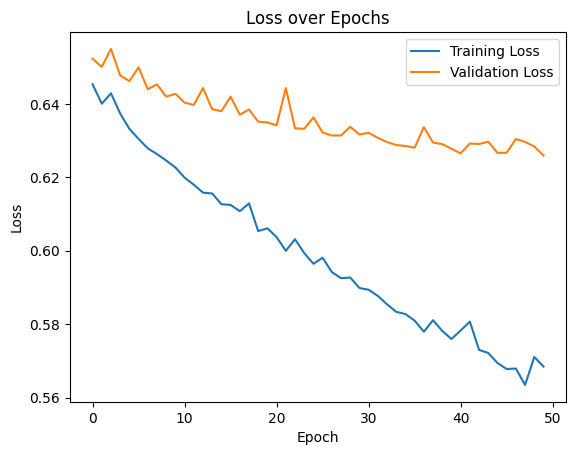

In [ ]:
test_loss, test_accuracy = vgg_model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Modelin tahminlerini al
y_pred = vgg_model.predict(x_test)
y_pred = (y_pred > 0.5)  # Sınıfları binary hale getir

# Confusion Matrix'i hesapla
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix'i görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# large Modeli eğitirken history almamışız
# Accuracy grafiğini çizdir
plt.plot(vgg_history.history['accuracy'], label='Training Accuracy')
plt.plot(vgg_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()

# Loss grafiğini çizdir
plt.plot(vgg_history.history['loss'], label='Training Loss')
plt.plot(vgg_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()

# Sonuçları Birleştirme
* En iyi sonuç veren ağlar mobilenetV3Small : 0.75 ile Vgg16 : 0.63

In [ ]:
input_tensor = keras.layers.Input(shape=(224, 224, 3), dtype=tf.float32)

In [ ]:
mobilenet_small = keras.applications.MobileNetV3Small(
    input_shape=(224, 224,3 ),
    alpha=1.0,
    minimalistic=False,
    include_top=False,
    weights="imagenet",
    dropout_rate=0.2,
    classifier_activation="sigmoid",
    classes=2,
    input_tensor=None,
    pooling=None,
    include_preprocessing=False,
)

"""small_model = keras.Sequential()
small_model.add(mobilenet_small)
small_model.add(keras.layers.GlobalAveragePooling2D())
small_model.add(keras.layers.Dense(128, activation='relu'))
small_model.add(keras.layers.Dropout(0.1))
small_model.add(keras.layers.Dense(64, activation='relu'))
small_model.add(keras.layers.Dropout(0.1))
small_model.add(keras.layers.Dense(32, activation='relu'))
small_model.add(keras.layers.Dropout(0.3))
small_model.add(keras.layers.Dense(1, activation='sigmoid'))"""

small_model = keras.Sequential()
small_model.add(keras.layers.Input(shape=(224, 224, 3)))
small_model.add(mobilenet_small)
small_model.add(keras.layers.GlobalAveragePooling2D())
small_model.add(keras.layers.Dense(128, activation='relu'))
small_model.add(keras.layers.Dropout(0.3))
small_model.add(keras.layers.Dense(64, activation='relu'))
small_model.add(keras.layers.Dropout(0.3))
small_model.add(keras.layers.Dense(32, activation='relu'))
small_model.add(keras.layers.Dropout(0.5))
small_model.add(keras.layers.Dense(1, activation='sigmoid'))

small_model.layers[0].trainable = False

small_model.summary()



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3small (Function  (None, 7, 7, 576)         939120    
 al)                                                             
                                                                 
 global_average_pooling2d_3  (None, 576)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_8 (Dense)             (None, 128)               73856     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dropout_6 (Dropout)         (None, 64)               

In [ ]:
vgg16 = tf.keras.applications.VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3),
    pooling='avg',

)


vgg_model = keras.models.Sequential()
vgg_model.add(vgg16)
vgg_model.add(keras.layers.Dense(256, activation='relu'))
vgg_model.add(keras.layers.Dropout(0,6))
vgg_model.add(keras.layers.Dense(1, activation='sigmoid'))

vgg_model.layers[0].trainable = False
vgg_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dense_12 (Dense)            (None, 256)               131328    
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 1)                 257       
                                                                 
Total params: 14846273 (56.63 MB)
Trainable params: 131585 (514.00 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
from keras.layers import Concatenate
from keras.layers import Flatten
from keras.models import Model
output = Concatenate()([Flatten()(small_model.output), Flatten()(vgg_model.output)])

output = keras.layers.Dropout(0.3)(output)
output = keras.layers.Dense(1, activation='sigmoid')(output)
#model = Model(inputs=[base_model2.input, base_model1.input], outputs = output)

concat_model = Model(inputs = [small_model.input, vgg_model.input], outputs = output)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
concat_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
concat_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 MobilenetV3small (Function  (None, 7, 7, 576)            939120    ['input_6[0][0]']             
 al)                                                                                              
                                                                                                  
 global_average_pooling2d_3  (None, 576)                  0         ['MobilenetV3small[0][0]']    
  (GlobalAveragePooling2D)                                                                        
                                                                                              

In [ ]:
concat_history = concat_model.fit([x_train,x_train], y_train, epochs=50, batch_size=32, validation_data=([x_vali,x_vali], y_vali))
concat_model.evaluate([x_test,x_test], y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

Epoch 1/50
35/35 [==============================] - 8s 231ms/step - loss: 0.5618 - accuracy: 0.7101 - val_loss: 0.6562 - val_accuracy: 0.6165
Epoch 2/50
35/35 [==============================] - 7s 191ms/step - loss: 0.5595 - accuracy: 0.6873 - val_loss: 0.6565 - val_accuracy: 0.6117
Epoch 3/50
35/35 [==============================] - 7s 192ms/step - loss: 0.5495 - accuracy: 0.7411 - val_loss: 0.6582 - val_accuracy: 0.6165
Epoch 4/50
35/35 [==============================] - 7s 191ms/step - loss: 0.5641 - accuracy: 0.6882 - val_loss: 0.6545 - val_accuracy: 0.6408
Epoch 5/50
35/35 [==============================] - 7s 189ms/step - loss: 0.5485 - accuracy: 0.7302 - val_loss: 0.6542 - val_accuracy: 0.6383
Epoch 6/50
35/35 [==============================] - 7s 188ms/step - loss: 0.5472 - accuracy: 0.7247 - val_loss: 0.6555 - val_accuracy: 0.6311
Epoch 7/50
35/35 [==============================] - 7s 188ms/step - loss: 0.5441 - accuracy: 0.7165 - val_loss: 0.6551 - val_accuracy: 0.6408
Epoch 

7/7 [==============================] - 1s 124ms/step - loss: 0.7356 - accuracy: 0.5250
Test Loss: 0.735583484172821
Test Accuracy: 0.5249999761581421
7/7 [==============================] - 2s 146ms/step


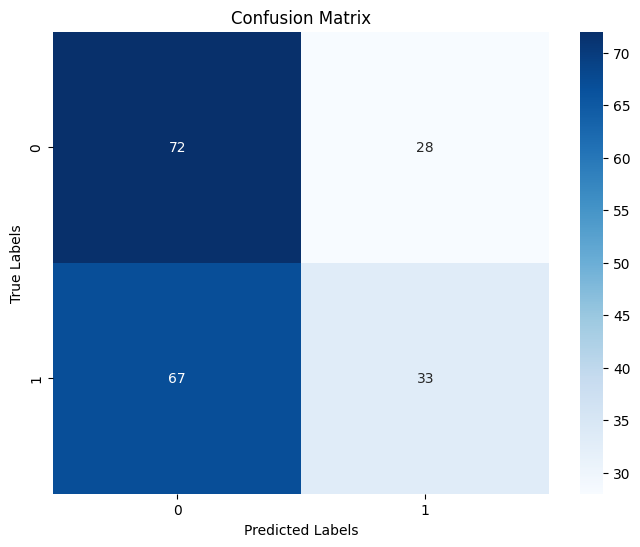

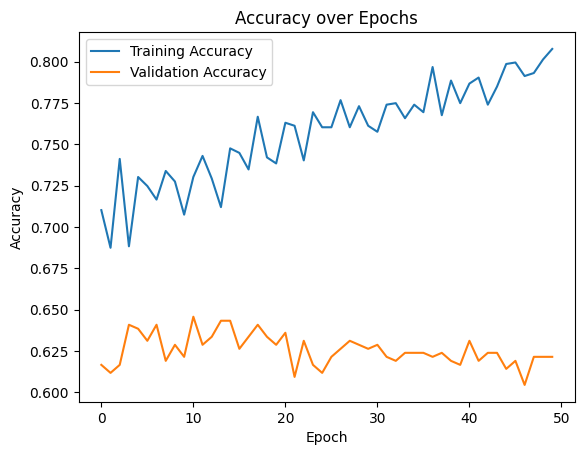

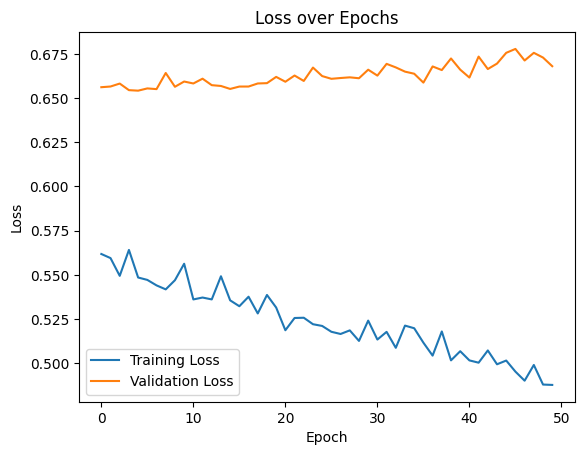

In [ ]:
test_loss, test_accuracy = concat_model.evaluate([x_test,x_test], y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Modelin tahminlerini al
y_pred = concat_model.predict([x_test, x_test])
y_pred = (y_pred > 0.5)  # Sınıfları binary hale getir

# Confusion Matrix'i hesapla
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix'i görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# large Modeli eğitirken history almamışız
# Accuracy grafiğini çizdir
plt.plot(concat_history.history['accuracy'], label='Training Accuracy')
plt.plot(concat_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()

# Loss grafiğini çizdir
plt.plot(concat_history.history['loss'], label='Training Loss')
plt.plot(concat_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()

1. veri seti ile eğitilmiş mobilenetsmall ile 2. veriseti ile eğitilmiş mobilenet small birleştirme

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
small_easy_model = keras.models.load_model('/content/gdrive/My Drive/small_model_hard.h5')
small_hard_model = keras.models.load_model('/content/gdrive/My Drive/small_model_easy.h5')

In [ ]:
from keras.layers import Input, Concatenate, Flatten, Dropout, Dense
from keras.models import Model

for layer in small_easy_model.layers:
    layer._name = f'easy_{layer.name}'

for layer in small_hard_model.layers:
    layer._name = f'hard_{layer.name}'


input_easy = Input(tensor=small_easy_model.input, name='unique_easy_input')
input_hard = Input(tensor=small_hard_model.input, name='unique_hard_input')

# Modelin çıktılarının düzleştirilmesi
easy_flatten = Flatten()(small_easy_model.output)
hard_flatten = Flatten()(small_hard_model.output)

# Çıktıları birleştirin
concatenated = Concatenate()([easy_flatten, hard_flatten])

# Dropout ve Dense katmanlarını ekleyin
dropout = Dropout(0.8)(concatenated)
output = Dense(1, activation='sigmoid')(dropout)

# Yeni model oluşturun
concat_model = Model(inputs=[input_easy, input_hard], outputs=output)


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
concat_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

concat_history = concat_model.fit([x_train, x_train], y_train,
                    batch_size=32,
                    epochs=50,
                    validation_data=([x_vali, x_vali], y_vali))

test_loss,test_accuracy = concat_model.evaluate([x_test, x_test], y_test, verbose=0)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

Epoch 1/50
35/35 [==============================] - 63s 341ms/step - loss: 0.6539 - accuracy: 0.6645 - val_loss: 0.6336 - val_accuracy: 0.7087
Epoch 2/50
35/35 [==============================] - 4s 113ms/step - loss: 0.6693 - accuracy: 0.6481 - val_loss: 0.6563 - val_accuracy: 0.6990
Epoch 3/50
35/35 [==============================] - 4s 114ms/step - loss: 0.6520 - accuracy: 0.6490 - val_loss: 0.6704 - val_accuracy: 0.7015
Epoch 4/50
35/35 [==============================] - 4s 113ms/step - loss: 0.6199 - accuracy: 0.6509 - val_loss: 0.6699 - val_accuracy: 0.7063
Epoch 5/50
35/35 [==============================] - 4s 113ms/step - loss: 0.6334 - accuracy: 0.6481 - val_loss: 0.6659 - val_accuracy: 0.7063
Epoch 6/50
35/35 [==============================] - 4s 113ms/step - loss: 0.6282 - accuracy: 0.6554 - val_loss: 0.6540 - val_accuracy: 0.7136
Epoch 7/50
35/35 [==============================] - 4s 114ms/step - loss: 0.6163 - accuracy: 0.6527 - val_loss: 0.6380 - val_accuracy: 0.7112
Epoch

7/7 [==============================] - 0s 35ms/step - loss: 0.4839 - accuracy: 0.8650
Test Loss: 0.4838622808456421
Test Accuracy: 0.8650000095367432
7/7 [==============================] - 2s 40ms/step


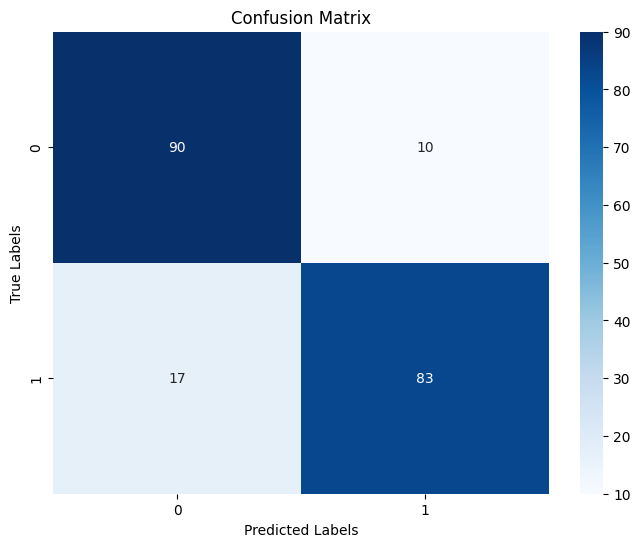

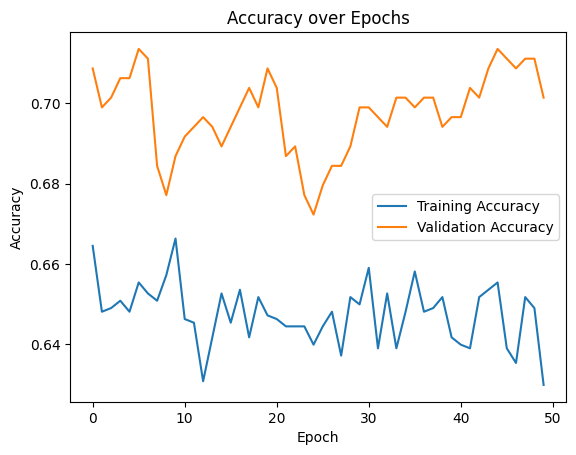

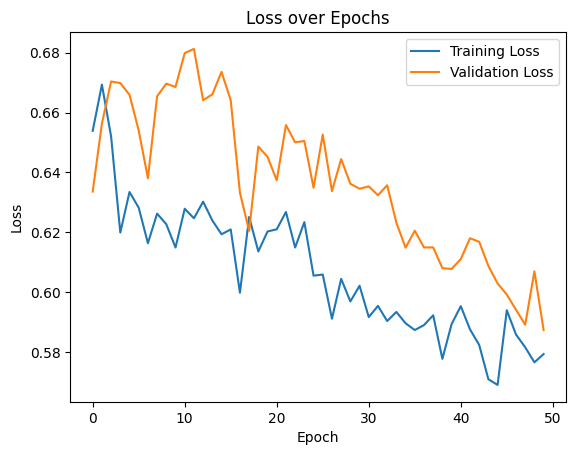

In [ ]:
test_loss, test_accuracy = concat_model.evaluate([x_test,x_test], y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Modelin tahminlerini al
y_pred = concat_model.predict([x_test,x_test])
y_pred = (y_pred > 0.5)  # Sınıfları binary hale getir

# Confusion Matrix'i hesapla
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix'i görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# large Modeli eğitirken history almamışız
# Accuracy grafiğini çizdir
plt.plot(concat_history.history['accuracy'], label='Training Accuracy')
plt.plot(concat_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()

# Loss grafiğini çizdir
plt.plot(concat_history.history['loss'], label='Training Loss')
plt.plot(concat_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()